Hierarchical clustering for graph G using scipy and linkage (euclidean distance)

In this part, linkage from scipy.cluster.hierarchy is used to perform hierarchical clustering for the graph G.
Clustering usually starts by computing a distance between every pair of units that you want to cluster.  A distance matrix will be symmetric (because the distance between x and y is the same as the distance between y and x) and will have zeroes on the diagonal (because every item is distance zero from itself). 

In the other part for this task, I tried to find distance matrix between all the nodes in graph, using nx.all_short_path_length. The code used so much time to execute, but I think it is better way to use that matrix for distance matrix in order to obtain linkage. 
Standard parametar for linkage function is metrics, which is usually euclidean distance between two instances. That is tricky part, because this way we are not sure in which context this function uses euclidean distance between two nodes from df_1['id'].
However, this is the way to perform hierarchical clustering, using scipy. 
After creating distance matrix, two clusters that are closest in distance are merging in one cluster, and distance matrix is being updated with regard to the new clusters. This repeats iterativly until only one cluster is a result. 

Agglomerative hierarchical clustering is used, which is specific for bottom-up priciple. (In the other hand, divisive clustering use top-down principle).

Complete linkage takes the distance between the clusters as the maximumum distance, d(i,j) where i is within claster C1, and j is within claster C2.



In [2]:
import json
import logging
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import scipy.stats as stats
from numpy import inf

def read_json(file):
      try:
        #print('Reading from input')
        with open(file, 'r') as f:
            return json.load(f)
      finally:
        print('Done reading')

d = read_json('/content/challenge_graph.json')
df_1 = pd.DataFrame(d['nodes'])
df_2 = pd.DataFrame(d['links'])

def read_json_file(filename):
    import networkx as nx 
    with open(filename) as f:
        js_graph = json.load(f)
        G = nx.Graph()
    return nx.node_link_graph(js_graph)

G = read_json_file('/content/challenge_graph.json')

Done reading


In [3]:
#Just one column wil be used because it is said to ignore values for qualities of the nodes q1, q2

cleaned_df_1 = df_1.drop(['q1', 'q2'], axis=1)
cleaned_df_1.head()

,id
0,48633953191
1,1438155667
2,37754729913
3,45694946584
4,8048097398


In [4]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [6]:
complete_clustering = linkage(cleaned_df_1, method = "complete", metric = "euclidean")

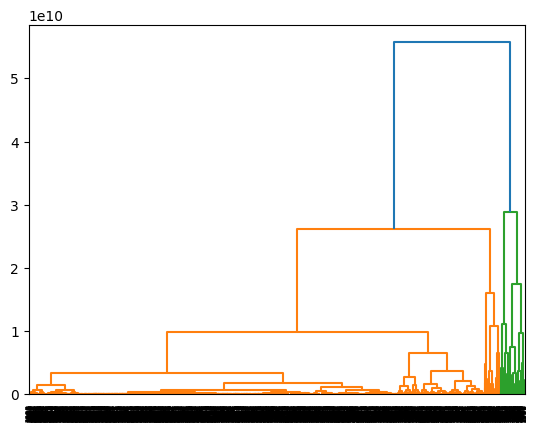

In [9]:
#This dendrogram shows clustering using method "complete", as explained above.
dendrogram(complete_clustering)
plt.show()

In [10]:
#These are single clustering (using min distance), and average clustering (using average distance), just to compare with the above one.
single_clustering = linkage(cleaned_df_1, method="single", metric="euclidean")
average_clustering = linkage(cleaned_df_1, method="average", metric="euclidean")

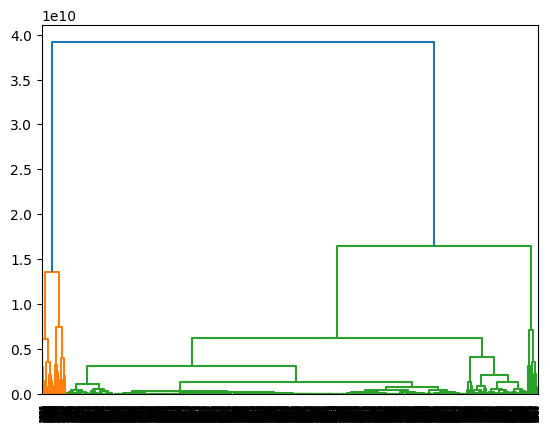

In [11]:
dendrogram(average_clustering)
plt.show()

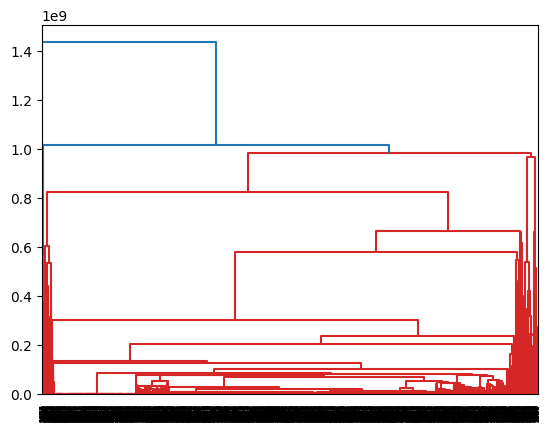

In [17]:
dendrogram(single_clustering)
plt.show()

This is example of usage linkage with manually computed distance matrix. Which will be done in the Clustering, for our input graph also.

In [15]:
from scipy.spatial.distance import squareform

my_dist = np.array([[0,2,3], [2, 0, 2], [3, 2, 0]])
condensed_dist = squareform(my_dist)

linkresult = linkage(condensed_dist)

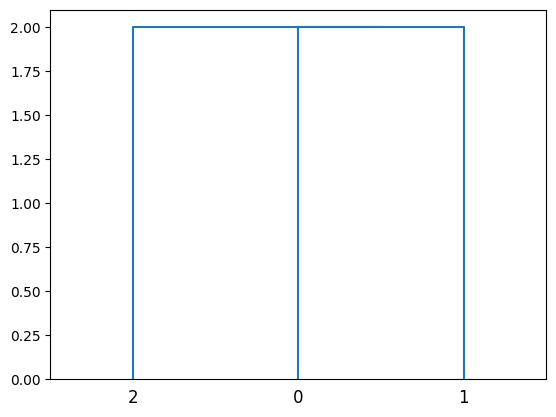

In [16]:
dendrogram(linkresult)
plt.show()